In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('datasets/housing_train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [18]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [19]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

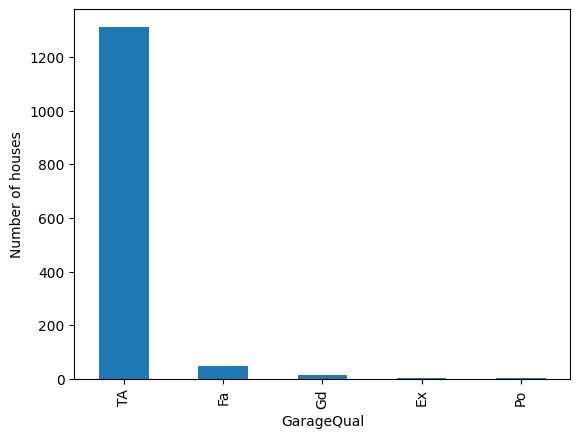

In [20]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [21]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

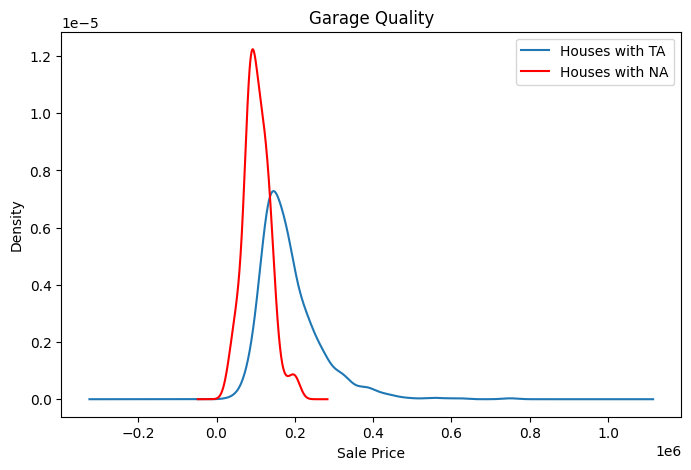

In [22]:
# Create a figure and axis object using OOP style
fig, ax = plt.subplots(figsize=(8, 5))  # Define figure size

# Plot KDE for houses with 'GarageQual' as 'TA'
ax = df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, label='Houses with TA')

# Plot KDE for houses with missing 'GarageQual'
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red', label='Houses with NA')

# Set title and labels
ax.set_title('Garage Quality')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Density')

# Add legend
ax.legend(loc='best')

# Show the plot
plt.show()


In [23]:
temp = df[df['GarageQual'] == 'TA']['SalePrice']

In [24]:
df['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

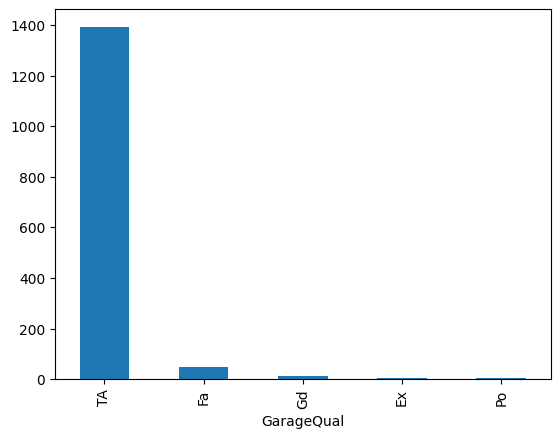

In [25]:
df['GarageQual'].value_counts().plot(kind='bar')

<bound method Axes.set_title of <Axes: ylabel='Density'>>

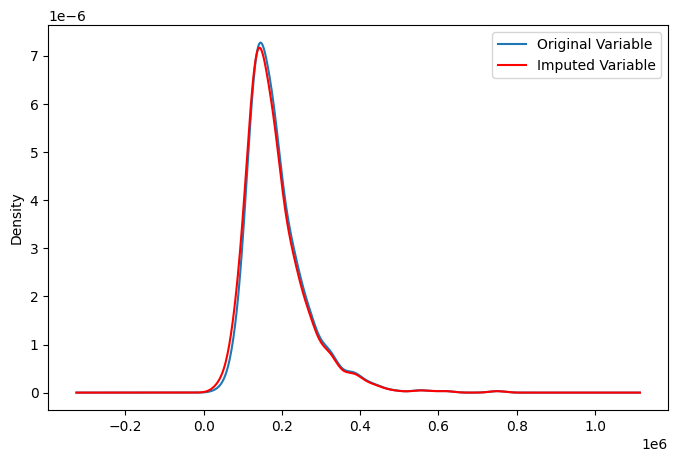

In [29]:
# Create figure and axis object using OOP approach
fig, ax = plt.subplots(figsize=(8, 5))

# Plot original variable distribution
temp.plot(kind='kde', ax=ax, label='Original Variable')

# Plot imputed variable distribution
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red', label='Imputed Variable')

# Add legend
ax.legend(loc='best')

# Set title and labels
ax.set_title('GarageQual')


<Axes: xlabel='FireplaceQu'>

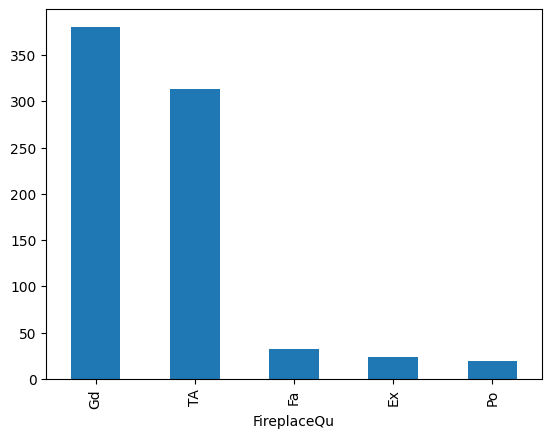

In [30]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [32]:
df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

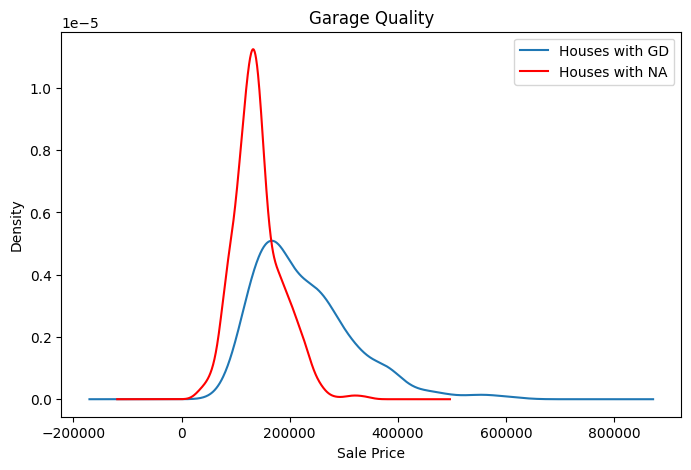

In [33]:
# Create a figure and axis object using OOP style
fig, ax = plt.subplots(figsize=(8, 5))  # Define figure size

# Plot KDE for houses with 'GarageQual' as 'TA'
ax = df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, label='Houses with GD')

# Plot KDE for houses with missing 'GarageQual'
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red', label='Houses with NA')

# Set title and labels
ax.set_title('Garage Quality')
ax.set_xlabel('Sale Price')
ax.set_ylabel('Density')

# Add legend
ax.legend(loc='best')

# Show the plot
plt.show()


In [34]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [35]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

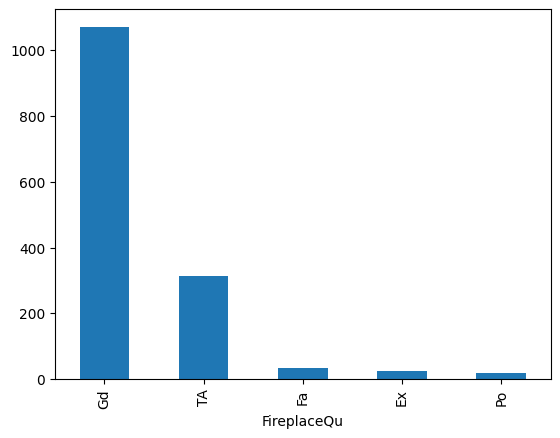

In [36]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

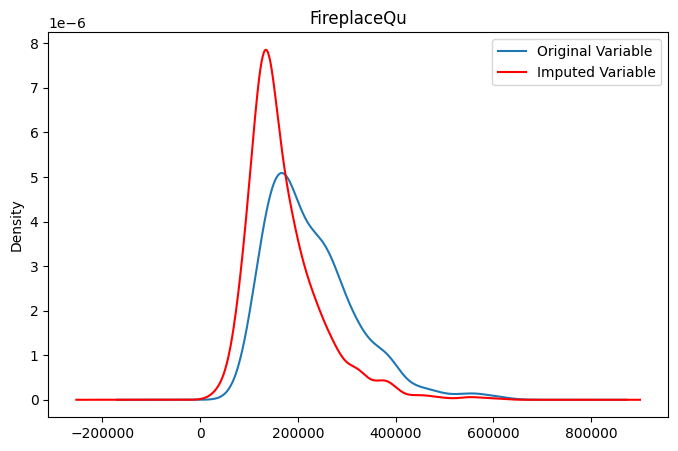

In [37]:
# Create figure and axis object using OOP approach
fig, ax = plt.subplots(figsize=(8, 5))

# Plot original variable distribution
temp.plot(kind='kde', ax=ax, label='Original Variable')

# Plot imputed variable distribution
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red', label='Imputed Variable')

# Add legend
ax.legend(loc='best')

# Set title and labels
ax.set_title('FireplaceQu')


## Using Sklearn

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy='most_frequent')

In [41]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Pappu\anaconda3\envs\ml_100\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [42]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)